In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
# Calculate daily returns
def daily_returns(adjusted_cp):
    r = (adjusted_cp / adjusted_cp.shift(1)) - 1
    return r


## $ ds_t = \mu * s_t dt + \sigma * s_t * dW_t $

## $ S_t = S_0 \exp ((\mu - \sigma^2 / 2) * t + \sigma W_t )$

In [2]:
mu = 0.1 
# number of time steps
n = 1000
# time in years
T = 1
# initial stock price
s0 = 100
# volatility
sigma = 0.30
# number of sims
M = 100

In [3]:
# Calc Each time step
dt = T/n # within 1 year I want 1000 level granularity
# simulate using np arrays
st = np.exp(
    (mu - sigma**2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size = (M,n)).T # each row of st is a simulation 
) # after transpose each col is a simulation

st = np.vstack([np.ones(M), st])
st = s0 * st.cumprod(axis = 0)

In [4]:
st[1] # at time point 1 value of all simulations

array([ 99.2796145 , 100.33535728, 100.25346255,  99.43560195,
       100.08980864,  98.74535009, 101.6396584 , 100.68402201,
       100.48993197, 102.78061009, 100.93768642,  99.17216827,
       101.59911077,  97.45937813,  99.03403091, 100.23837135,
       100.76518768, 100.81669286, 101.11635195,  98.91246714,
        99.96739047, 100.12951131,  99.90972603, 100.80217845,
        99.12436739, 100.3277892 , 102.59077731,  99.98032616,
        99.76007918,  98.08869615,  99.91077266,  98.00070604,
       100.08367282,  99.9116408 ,  99.51094632, 101.45474884,
       100.63728412,  99.47318471, 100.0868847 , 100.6054918 ,
        99.31727593, 100.6625789 , 101.01810134,  99.09391037,
       100.39497572,  98.75696603,  99.58259976,  99.3436942 ,
       101.35622746, 101.22278361, 103.0270256 ,  99.94613908,
       100.58801243,  99.7695533 , 100.6470692 , 100.36741336,
       100.41200482,  98.91020784, 100.12505185, 101.25218771,
       100.458157  , 100.58768129,  99.92004792,  99.17

In [5]:
time = np.linspace(0, T, n+1)
tt = np.full(shape = (M, n+1), fill_value=time).T

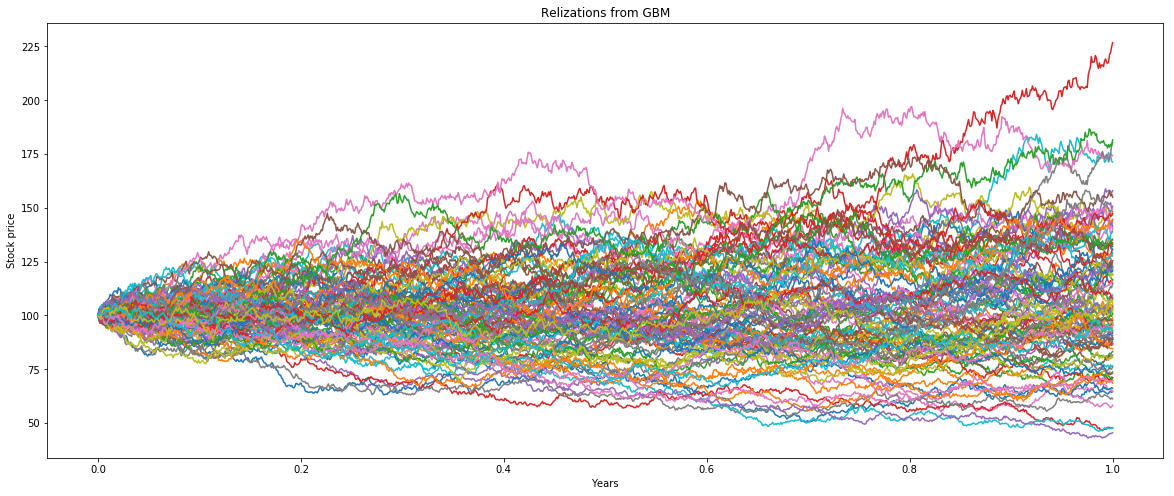

In [6]:
plt.figure(figsize = (20, 8))
plt.plot(tt,st)
plt.xlabel("Years")
plt.ylabel("Stock price")
plt.title("Relizations from GBM")
plt.show()

## For a portfolio of stocks

In [7]:
stocks = pd.read_csv("Portfolio.csv", index_col = "Date")

In [8]:
returns = stocks.apply(daily_returns).dropna()

In [9]:
mu = [0.04, 0.04, 0.04]
w = np.array([0.40, 0.30, 0.30])
T = 1 # 1 year
n = 1000 # 1000 cuts in 1 year
m = 100 # num sims
p = stocks.shape[1]
s0 = np.array(stocks.iloc[0])
sigma = np.array(returns.std())
dt = T/n

cor_returns = returns.corr()
cov_returns = returns.cov()
L = np.linalg.cholesky(cor_returns)

simulated_data = np.empty((n+1, m))
for i in range(m):
    correlated_random = (L @ np.random.normal(0, np.sqrt(dt), size = (n,p)).T).T
    st = np.exp(
    (mu - sigma**2 / 2) * dt + sigma * correlated_random 
    ) 
    # Each col of st is a particular stock's movement over time
    st = np.vstack([np.ones(p), st])
    st = s0 * st.cumprod(axis = 0)
    portfolio = (st*w).sum(axis = 1)
    simulated_data[:, i] = portfolio.T

time = np.linspace(0, T, n+1)
tt = np.full(shape = (m, n+1), fill_value=time).T

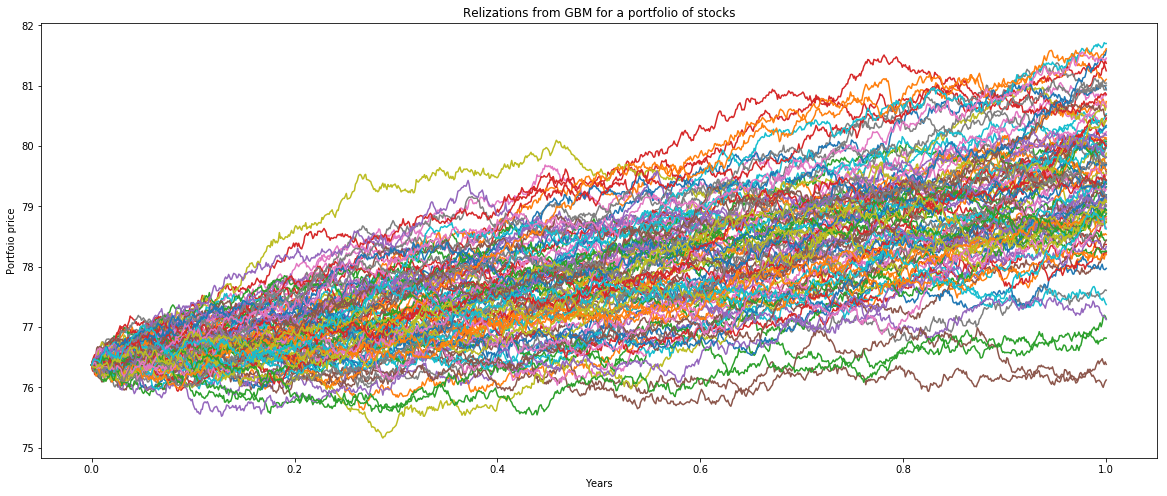

In [10]:
plt.figure(figsize = (20, 8))
plt.plot(tt,simulated_data)
plt.xlabel("Years")
plt.ylabel("Portfoio price")
plt.title("Relizations from GBM for a portfolio of stocks")
plt.show()